<font size="8" align="center">**Transformada de Fourier e sua aplicação em processamento de imagens.**</font>



Uma imagem é vista pelo computador como matrizes de numeros digitais, por isto é necessario representar imagens como arranjos bidimensionais de pontos.

Como exemplifica imagem abaixo, onde podemos ver um ponto sendo selecionado por seu indice (M,N) onde M são as linhas e N as colunas, e o indice vai de 0 a m-1 e de 0 a n-1. 


<img src="imagembidimensional.jpg">

Por exemplo, a imagem abaixo, aberta pela função "imread" da biblioteca Opencv para python, entende a imagem como uma matriz tridimensional de (165,166)



<img src="x2.jpg">

**Verificando as dimensões e a diagonal da matriz.**

In [37]:

import cv2


img = cv2.imread('x2.jpg',0)

print("Diensões:",img.shape)
print("------------------------------------------------------------------------------")
print(img.diagonal())




Diensões: (165, 166)
------------------------------------------------------------------------------
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3   0   0   0   0   0 255 254 255 250 255 255 255   0
   4   1   2   0   0   0   3   4   0   0   0   0   0   0   0   1 255 255
 255 253 255 254 255 255 255 255 255 253 255 255 255 255 251 255 255 254
 252 254   1 254 253 255 255 253 251 255 252 255 253 255   1   1   0   3
   0   0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]


**Aplicando a Transformada de Fourier**

Observe que não houve modificação das dimensões da matriz, apenas de seus valores, inclusive o surgimento de numeros imaginarios.

In [42]:
import cv2
import numpy as np

f = np.fft.fft2(img) #aplicando a FFT na imagem
print("Dimensões:",f.shape)
print("------------------------------------------------------------------------------")
print(f.diagonal())

Dimensões: (165, 166)
------------------------------------------------------------------------------
[  1.09677000e+05 +0.00000000e+00j   4.21086471e+04 +3.03778935e+04j
   8.91036224e+03 +4.00215237e+04j  -1.60774435e+04 +3.91864064e+04j
  -2.46050354e+04 +1.12043941e+04j  -2.37074922e+04 +4.67776200e+02j
  -5.36212770e+03 -7.49837291e+03j  -5.95587487e+03 -4.68683676e+02j
  -6.79465309e+03 +5.12088782e+03j  -1.83404712e+04 -4.52040876e+03j
  -1.85314091e+04 -1.17295865e+04j  -6.10817532e+03 -2.88868267e+04j
   1.14434832e+04 -2.61020815e+04j   2.80116823e+04 -1.36842647e+04j
   2.81266506e+04 +7.24224017e+03j   1.46662270e+04 +1.81837714e+04j
  -2.82700208e+02 +2.06343345e+04j  -1.00707468e+04 +9.81870441e+03j
  -9.35231228e+03 +1.78935300e+03j  -5.63451696e+02 -3.31005439e+03j
  -2.23130475e+02 +1.30630975e+03j   1.50374261e+03 +8.21722110e+03j
  -8.81878233e+03 +6.96640358e+03j  -1.28092027e+04 -1.38625280e+03j
  -9.47277542e+03 -1.02494400e+04j  -6.29665914e+02 -1.30429915e+04j
  

<font size="8">**1-Aplicação em imagens**</font>


A transformada de Fourier possui diversas aplicações em processamento de imagens, como remoção de ruidos, analise de frequencias, identificação de objetos e outros. Abaixo um exemplo da aplicação de uma DFT(Discrete Fourier Transform) exibindo o espectro de magnitude de uma imagem. 

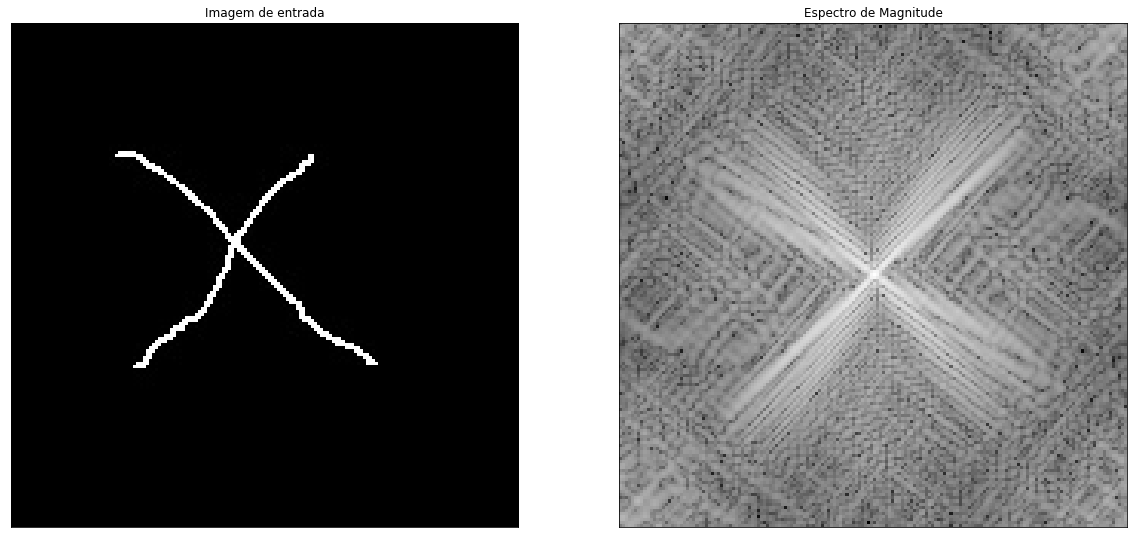

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

#com numpy
img = cv2.imread('x2.jpg',0) #importando e lendo a imagem
f = np.fft.fft2(img) #aplicando a FFT na imagem

fshift = np.fft.fftshift(f) #joga as frequencias zero no centro da matriz para observar as menores frequencias(pixel branco) ao centro e nao espalhadas
magnitude_spectrum = 20*np.log(np.abs(fshift)) #aplica o espectro de magnitude 

plt.subplot(121),plt.imshow(img, cmap = 'gray') #plota imagem de entrada
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([]) #define o titulo e retira os eixos
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray') #plota espectro de magnitude
plt.title('Espectro de Magnitude'), plt.xticks([]), plt.yticks([]) #define o titulo e retira os eixos
plt.show() #mostre a imagem

In [ ]:
Abaixo, o espectro de magnitude e tambem o de fases, ambos são essenciais para realizar a transformada inversa e possuir a imagem original completa novamente.

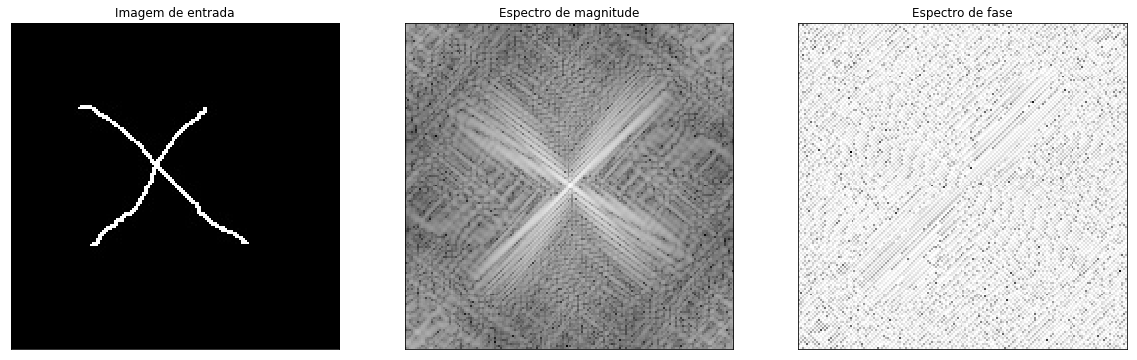

In [49]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

img = cv2.imread('x2.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
phase_spectrum = 20*np.log(cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro de magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Espectro de fase'), plt.xticks([]), plt.yticks([])
plt.show()

<font size="8">**2-Aplicando filtragem passa baixa**</font>



Uma das utilizações da DFT é aplicar filtros na imagem, no caso abaixo vimos a passa baixa(LPF) sendo utilizada, onde aplicamos uma mascara a imagem e retiramos as frequencias altas, que geralmente são os contornos da figura, deixando apenas as frequencias baixas, que deixam ela borrada.

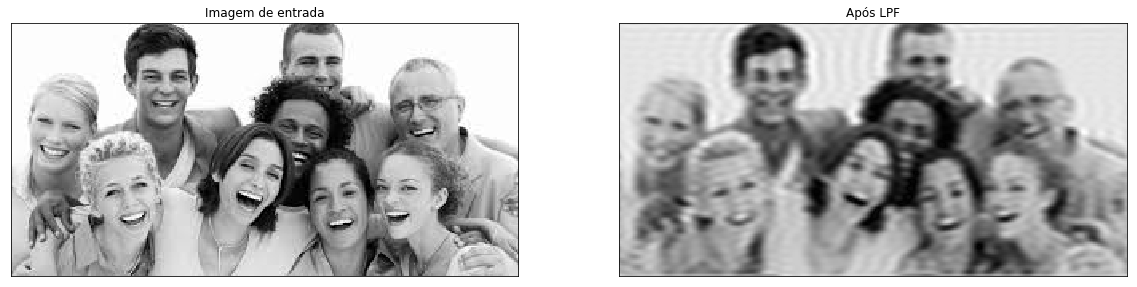

In [19]:
img = cv2.imread('teste2.jpg',0)
f = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
plt.figure(figsize=(20,10))

#LPF 


rows, cols = img.shape 
crow,ccol = rows/2 , cols/2


#cria uma mascara deixando o centro, ou seja todos os valores trazidos ao centro com valor 1
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 1

#aplica-se a mascara e se altera o valor do restante dos valores, mantem em zero, assim retirando as frequencias altas
#depois aplica-se a transformada inversa e retorna a imagem apenas com as frequencias baixas.
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Após LPF'), plt.xticks([]), plt.yticks([])
plt.show()


<font size="8">**3-Aplicando filtragem passa alta**</font>

O contrario da filtragem acima, a filtragem passa alta(HPF) separa somente as altas frequencias, o que ressalta o contorno da imagem. 

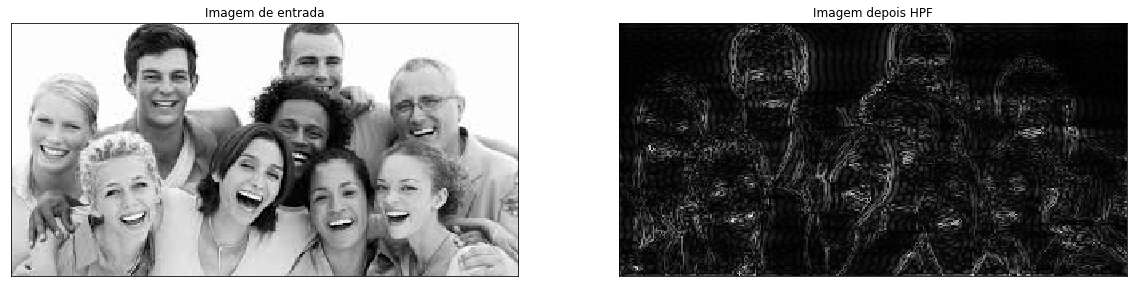

In [118]:
plt.figure(figsize=(20,10))

img = cv2.imread('teste2.jpg',0)
f = np.fft.fft2(img)

fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))



rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Imagem depois HPF'), plt.xticks([]), plt.yticks([])
#plt.subplot(133),plt.imshow(img_back)
#plt.title('Resultado final'), plt.xticks([]), plt.yticks([])

plt.show()


Fontes: 
    
    http://www.inf.pucrs.br/~pinho/CG/Aulas/Img/IMG.htm
    
    http://web.archive.org/web/20130513181427id_/http://sharp.bu.edu/~slehar/fourier/fourier.html#filtering
    
    https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
    
    http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT_2.php
    
    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2014.1/Rita-Tutorial-PDI.pdf
    